In [559]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import sqlite3
import pickle
import copy
import json
import math
import pandas as pd
import os

Switch here between KEYWORD and AsSIGNEE search

In [560]:
search_term = "keyword"
json_input = "json_data/keyword_search_data_20211217_no_guided.json"

# search_term = "assignee"
# json_input = "json_data/assignee_search_data_20211203.json"

In [561]:
filtered_data = []
counter = 0

for line in open(json_input, 'r'):
#     print(counter)
    tmp_data = json.loads(line)
    assignee_check = tmp_data['assignee_harmonized']
#     print(assignee_check)
    if len(assignee_check) > 0:
        assignee = tmp_data['assignee_harmonized'][0]['name']
    else: 
        assignee = '' 
    date = tmp_data['publication_date'][:4]
    country = tmp_data['country_code']
    pub = tmp_data['publication_number']
    counter += 1
    
    filtered_data.append([pub, date, country, assignee])

In [562]:
len(filtered_data)

32269

In [563]:
# put the data into a dataframe
df = pd.DataFrame(filtered_data)
df.columns = ["pub", "year", "country", "assignee"]

In [564]:
df.shape

(32269, 4)

In [565]:
df = df.drop_duplicates()

In [566]:
df.shape

(11093, 4)

In [567]:
# reduce to totals and get count 
df_total = df.groupby(['assignee']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [568]:
# drop any rows with no entry for assignee
df_total = df_total[df_total.assignee != ""]

In [569]:
# drop any rows with "Amazon"
# df_total = df_total[df_total.assignee != "AMAZON TECH INC"]

In [570]:
df_total.head()

,assignee,count
199,AUTOSTORE TECH AS,233
2166,MURATA MACHINERY LTD,212
3277,SYMBOTIC LLC,194
1483,IBM,170
2344,OCADO INNOVATION LTD,116


In [571]:
df_total.shape

(4167, 2)

In [572]:
# also make a set of data with totals by year
dfa = df.groupby(["year", "assignee"]).size().reset_index(name="count").sort_values(by=['year'],ascending=[True])

In [573]:
# convert to datetime data type
dfa["year"] = pd.to_datetime(dfa["year"], format='%Y')

In [574]:
dfa.dtypes

year        datetime64[ns]
assignee            object
count                int64
dtype: object

In [575]:
dfa.shape

(6190, 3)

In [576]:
dfa.head()

,year,assignee,count
0,1938-01-01,SACO LOWELL SHOPS,1
1,1954-01-01,ELECTRO PNEUMATIC LOOMS LTD,1
2,1968-01-01,HARTMAN METAL FABRICATORS INC,1
3,1969-01-01,CERAMICA F MARAZZI S P A,1
4,1971-01-01,GULF & WESTERN IND PROD CO,1


In [577]:
dfa.tail()

,year,assignee,count
5851,2021-01-01,HEBEI ZEBANG SUPPLY CHAIN MAN CO LTD,1
5850,2021-01-01,HEBEI WEICHUANG POWER EQUIPMENT CO LTD,1
5849,2021-01-01,HARBIN INST TECHNOLOGY,1
5862,2021-01-01,HUATING COAL GROUP CO LTD,2
6189,2021-01-01,eStack LLC,1


In [578]:
dfa.count()

year        6190
assignee    6190
count       6190
dtype: int64

In [579]:
# test plot

# fig, ax = plt.subplots()
# dfa[dfa['assignee'] == 'AUTOSTORE TECH AS'].plot(x='year', y='count', ax=ax, legend=False)
# # ax.set_xlim([-10, 5])
# ax.set_title("AutoStore")

In [580]:
# another test plot

# fig, ax = plt.subplots()
# dfa[dfa['assignee'] == 'MURATA MACHINERY LTD'].plot(x='year', y='count', ax=ax, legend=False)
# ax.set_title("Murata")

In [581]:
# get a list of the assignees in order
ordered_assignees = df_total.set_index("assignee").index

In [582]:
ordered_assignees

Index(['AUTOSTORE TECH AS', 'MURATA MACHINERY LTD', 'SYMBOTIC LLC', 'IBM',
       'OCADO INNOVATION LTD', 'DEMATIC CORP', 'WALMART APOLLO LLC',
       'ALERT INNOVATION INC', 'TGW LOGISTICS GROUP GMBH', 'AMAZON TECH INC',
       ...
       'JIANGSU SHAGANG GROUP CO LTD', 'JIANGSU SHIYE LOGISTICS CO LTD',
       'JIANGSU SHOUDU PASSWORD AGRICULTURAL PRODUCTS CO LTD',
       'JIANGSU TIANYING ENVIRONMENTAL PROT ENERGY COMPLETE EQUIPMENT CO LTD',
       'JIANGSU TOBACCO CORP YANGZHOU',
       'JIANGSU TONGHUI MACHINERY & ELECTRICAL EQUIPMENT CO LTD',
       'JIANGSU VOCATIONAL COLLEGE OF ELECTRONICS & INFORMATION',
       'JIANGSU WATER CONSERVANCY AND FLOOD CONTROL MAT RESERVE CENTER',
       'JIANGSU WEIZHUAN AUTOMATION MACHINERY EQUIPMENT CO LTD', 'eStack LLC'],
      dtype='object', name='assignee', length=4167)

           year           assignee  count
3709 2017-01-01  AUTOSTORE TECH AS      2
4072 2018-01-01  AUTOSTORE TECH AS     16
4481 2019-01-01  AUTOSTORE TECH AS     56
5018 2020-01-01  AUTOSTORE TECH AS     61
5718 2021-01-01  AUTOSTORE TECH AS     98
           year              assignee  count
261  1992-01-01  MURATA MACHINERY LTD      3
309  1993-01-01  MURATA MACHINERY LTD      7
345  1994-01-01  MURATA MACHINERY LTD     13
424  1996-01-01  MURATA MACHINERY LTD      2
471  1997-01-01  MURATA MACHINERY LTD      4
519  1998-01-01  MURATA MACHINERY LTD      9
590  1999-01-01  MURATA MACHINERY LTD      6
656  2000-01-01  MURATA MACHINERY LTD     21
746  2001-01-01  MURATA MACHINERY LTD     29
860  2002-01-01  MURATA MACHINERY LTD     22
971  2003-01-01  MURATA MACHINERY LTD     13
1064 2004-01-01  MURATA MACHINERY LTD      3
1157 2005-01-01  MURATA MACHINERY LTD      4
1278 2006-01-01  MURATA MACHINERY LTD      2
1410 2007-01-01  MURATA MACHINERY LTD      3
1563 2008-01-01  MURATA MACH

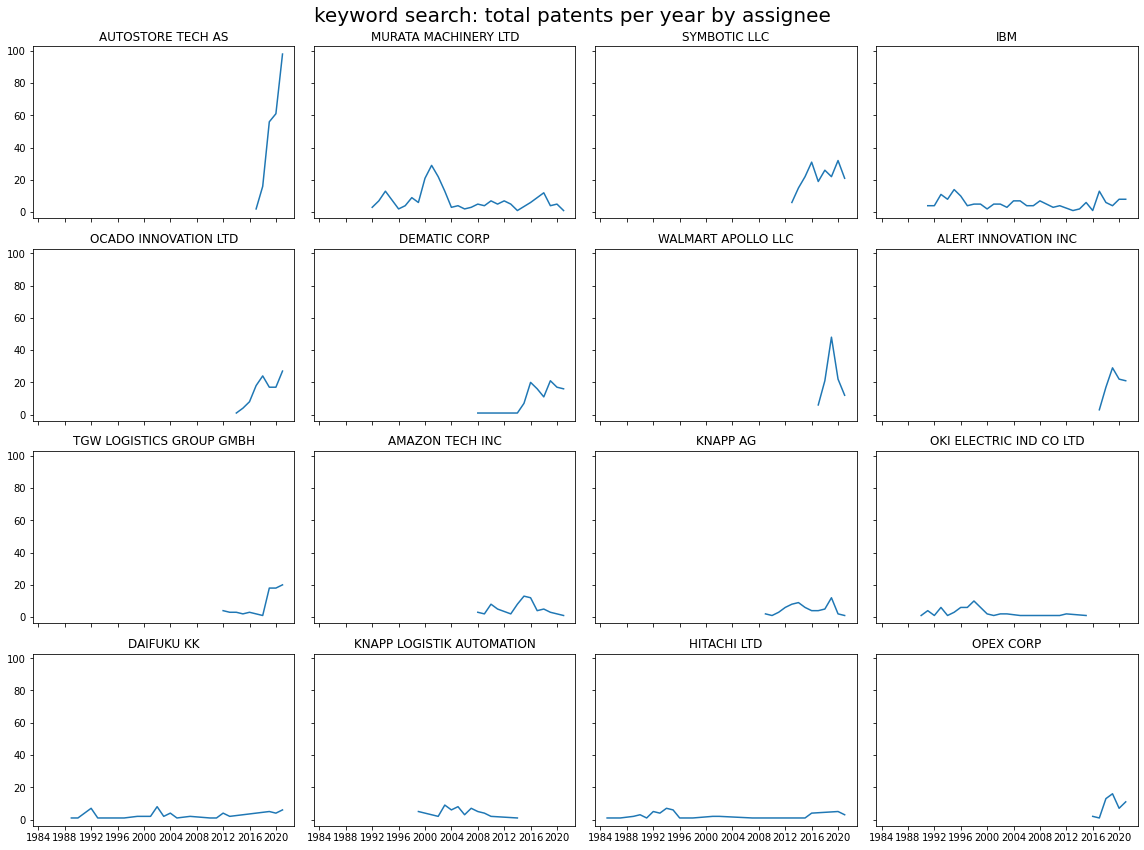

In [584]:
xdim = 4
ydim = 4
fig, ax = plt.subplots(nrows=ydim, ncols=xdim, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_size_inches(16, 12)

fig.suptitle(f'{search_term} search: total patents per year by assignee', size=20)

for i in range(ydim):
    for j in range(xdim):
        idx = (i * xdim) + j
#     for target_assignee in ordered_assignees[1:17]:
    #     print(target_assignee)
    #     selection = dfa.get_group(countryname)
        selection = dfa[dfa['assignee'] == ordered_assignees[idx]].sort_values(by=['year'],ascending=[True])
#         .sort_values(by=['year'],ascending=[True])
#         print(selection)

        ax[i,j].set_title(ordered_assignees[idx])
#         selection.plot(x='year', y='count', label=ordered_assignees[idx], ax=ax[i,j], legend=False)
        ax[i,j].plot(selection["year"], selection["count"])

plt.tight_layout()

In [585]:
filename = f'plot_{search_term}_top_assignees_year_'
# filename = f'plot_{search_term}_top_assignees_year_no_amazon_'
i = 0
while os.path.exists(filename+"%s" % i):
    i += 1
filename += str(i)+".jpg"
print(filename)
fig.savefig(filename, dpi=300)

plot_keyword_top_assignees_year_0.jpg
